<a href="https://colab.research.google.com/github/Ramee00/UDAAN-Intern/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [4]:
!nvidia-smi

Tue Dec 31 18:15:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [6]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WnM4fwvr2D2m3k8wKSPO")
project = rf.workspace("ramee").project("runway-opqib")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Runway-2 in yolov8:: 100%|██████████| 16016/16016 [00:03<00:00, 5112.54it/s]


In [9]:
print(dataset.location)


/content/Runway-2


In [10]:
from ultralytics import YOLO



In [11]:

# Initialize the YOLOv8 model (e.g., YOLOv8n for the Nano model)
model = YOLO("yolov8n.pt")  # You can change this to "yolov8s.pt", "yolov8m.pt", etc.



100%|██████████| 6.25M/6.25M [00:00<00:00, 90.7MB/s]


In [12]:
# Train the model
results = model.train(
    data=f"/content/Runway-2/data.yaml",  # Path to the downloaded dataset's data.yaml
    epochs=50,                             # Number of epochs (adjust as needed)
    batch=16,                              # Batch size (adjust based on your hardware)
    imgsz=640                              # Image size (adjust if necessary)
)



New https://pypi.org/project/ultralytics/8.3.56 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Runway-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Runway-2/train/labels... 5578 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5578/5578 [00:02<00:00, 1890.71it/s]


train: New cache created: /content/Runway-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Runway-2/valid/labels... 1420 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1420/1420 [00:02<00:00, 558.25it/s]

val: New cache created: /content/Runway-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 205, len(boxes) = 2813. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.28G      1.798      2.405      1.666         31        640: 100%|██████████| 349/349 [01:56<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.11it/s]


                   all       1420       2813      0.195     0.0707      0.053     0.0225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.15G      1.806      1.942      1.655         25        640: 100%|██████████| 349/349 [01:48<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]


                   all       1420       2813      0.124     0.0707     0.0311      0.013

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.2G      1.781      1.845      1.644         23        640: 100%|██████████| 349/349 [01:47<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]


                   all       1420       2813      0.313       0.18      0.142     0.0548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.2G      1.718      1.736      1.607         24        640: 100%|██████████| 349/349 [01:49<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.70it/s]


                   all       1420       2813      0.224      0.102      0.073     0.0306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.19G       1.63      1.622      1.548         28        640: 100%|██████████| 349/349 [01:49<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  3.90it/s]


                   all       1420       2813      0.358      0.208      0.179     0.0805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.17G      1.573      1.548      1.508         23        640: 100%|██████████| 349/349 [01:48<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.34it/s]


                   all       1420       2813      0.413      0.222      0.199     0.0874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.17G      1.541      1.507      1.486         25        640: 100%|██████████| 349/349 [01:47<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.41it/s]


                   all       1420       2813      0.363      0.189      0.162      0.068

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.15G      1.496      1.464      1.477         33        640: 100%|██████████| 349/349 [01:47<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.41it/s]


                   all       1420       2813      0.331      0.233      0.198     0.0846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      1.454        1.4      1.437         25        640: 100%|██████████| 349/349 [01:48<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.46it/s]


                   all       1420       2813      0.444      0.266      0.247      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.17G      1.439      1.372      1.427         24        640: 100%|██████████| 349/349 [01:50<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.74it/s]


                   all       1420       2813      0.416      0.244      0.231     0.0989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.2G      1.405      1.337      1.406         12        640: 100%|██████████| 349/349 [01:49<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  3.81it/s]


                   all       1420       2813      0.381      0.211      0.187     0.0784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.17G      1.397      1.332      1.393         23        640: 100%|██████████| 349/349 [01:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.43it/s]


                   all       1420       2813      0.387      0.225      0.208     0.0865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.2G      1.379      1.299      1.388         28        640: 100%|██████████| 349/349 [01:48<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.29it/s]


                   all       1420       2813      0.479      0.294      0.292      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G      1.366      1.266      1.379         17        640: 100%|██████████| 349/349 [01:47<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.39it/s]


                   all       1420       2813      0.502      0.258       0.27      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.17G      1.355      1.263      1.367         30        640: 100%|██████████| 349/349 [01:49<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  3.97it/s]

                   all       1420       2813      0.481      0.304        0.3      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.16G      1.325      1.223      1.351         24        640: 100%|██████████| 349/349 [01:50<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  3.84it/s]


                   all       1420       2813      0.474      0.288       0.28       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.18G      1.318      1.202      1.347         31        640: 100%|██████████| 349/349 [01:49<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.55it/s]


                   all       1420       2813      0.496      0.323      0.313      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.17G      1.293      1.194      1.333         32        640: 100%|██████████| 349/349 [01:47<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.29it/s]


                   all       1420       2813      0.536      0.285      0.298      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.21G      1.283      1.171      1.326         30        640: 100%|██████████| 349/349 [01:47<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.39it/s]


                   all       1420       2813      0.473      0.301      0.291      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.16G      1.286      1.152      1.331         40        640: 100%|██████████| 349/349 [01:47<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.29it/s]

                   all       1420       2813      0.564      0.318      0.339      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.19G      1.263       1.14      1.315         20        640: 100%|██████████| 349/349 [01:47<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.32it/s]


                   all       1420       2813      0.548      0.324      0.343      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G      1.269      1.136      1.308         25        640: 100%|██████████| 349/349 [01:47<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.31it/s]


                   all       1420       2813      0.551      0.331       0.35       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.15G      1.245      1.109      1.295         27        640: 100%|██████████| 349/349 [01:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  4.00it/s]

                   all       1420       2813      0.527      0.325       0.34      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.15G      1.235      1.093      1.292         14        640: 100%|██████████| 349/349 [01:49<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.39it/s]


                   all       1420       2813      0.559      0.344      0.353      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.19G      1.234       1.09      1.293         23        640: 100%|██████████| 349/349 [01:47<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]


                   all       1420       2813      0.552       0.34      0.358      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.15G      1.209       1.07      1.276         24        640: 100%|██████████| 349/349 [01:45<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]


                   all       1420       2813      0.544      0.313      0.323      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.17G      1.198      1.059      1.276         22        640: 100%|██████████| 349/349 [01:46<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]


                   all       1420       2813      0.561      0.326      0.345      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.16G      1.187      1.039      1.265         25        640: 100%|██████████| 349/349 [01:50<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  4.00it/s]


                   all       1420       2813      0.571      0.337      0.347      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.18G      1.175      1.028      1.258         27        640: 100%|██████████| 349/349 [01:46<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.42it/s]

                   all       1420       2813      0.617      0.342       0.37      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.17G      1.169      1.016      1.256         30        640: 100%|██████████| 349/349 [01:45<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.32it/s]


                   all       1420       2813      0.573      0.345      0.362      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.17G       1.16      1.009      1.246         22        640: 100%|██████████| 349/349 [01:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]


                   all       1420       2813       0.57      0.342      0.362      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.14G      1.157     0.9992      1.248         26        640: 100%|██████████| 349/349 [01:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.44it/s]

                   all       1420       2813      0.612      0.342      0.379      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.19G      1.136     0.9776      1.238         29        640: 100%|██████████| 349/349 [01:46<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.58it/s]


                   all       1420       2813      0.577      0.372      0.392      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.17G      1.138     0.9599      1.239         32        640: 100%|██████████| 349/349 [01:49<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.71it/s]

                   all       1420       2813      0.595      0.372      0.394      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.15G      1.123     0.9664      1.231         30        640: 100%|██████████| 349/349 [01:46<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.31it/s]


                   all       1420       2813      0.603      0.358       0.38      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.16G      1.117     0.9476      1.226         19        640: 100%|██████████| 349/349 [01:44<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.46it/s]


                   all       1420       2813      0.618      0.349      0.387      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G      1.109     0.9513      1.219         33        640: 100%|██████████| 349/349 [01:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.33it/s]


                   all       1420       2813      0.627      0.358       0.39      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.15G      1.114     0.9479      1.225         22        640: 100%|██████████| 349/349 [01:46<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.73it/s]


                   all       1420       2813      0.604      0.366      0.394      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.17G      1.101     0.9293       1.21         20        640: 100%|██████████| 349/349 [01:49<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  3.88it/s]

                   all       1420       2813      0.584      0.367      0.392      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.15G      1.092      0.923      1.212         25        640: 100%|██████████| 349/349 [01:47<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.34it/s]

                   all       1420       2813      0.581      0.366      0.389      0.175


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.17G     0.9539     0.6935      1.126         20        640: 100%|██████████| 349/349 [01:46<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]


                   all       1420       2813      0.604      0.371      0.405      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.16G     0.9268     0.6668      1.112         14        640: 100%|██████████| 349/349 [01:44<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.75it/s]

                   all       1420       2813      0.607      0.371      0.399      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.16G     0.9207     0.6464      1.102         14        640: 100%|██████████| 349/349 [01:46<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  4.08it/s]


                   all       1420       2813      0.638       0.36      0.406      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.15G     0.8954     0.6371      1.096         15        640: 100%|██████████| 349/349 [01:46<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.59it/s]


                   all       1420       2813      0.629      0.371      0.409      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.18G     0.8902     0.6245      1.088         14        640: 100%|██████████| 349/349 [01:43<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.38it/s]

                   all       1420       2813      0.629      0.363      0.404      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.15G     0.8748     0.6189      1.077         19        640: 100%|██████████| 349/349 [01:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]


                   all       1420       2813      0.643      0.354      0.403      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.16G     0.8686     0.6099      1.075         15        640: 100%|██████████| 349/349 [01:44<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.34it/s]


                   all       1420       2813      0.615       0.37      0.408      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.15G      0.865     0.6008      1.072         13        640: 100%|██████████| 349/349 [01:44<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.40it/s]


                   all       1420       2813      0.603      0.382      0.413      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G     0.8545     0.5946      1.064         12        640: 100%|██████████| 349/349 [01:45<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  4.06it/s]

                   all       1420       2813      0.634      0.376      0.417      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.16G     0.8385     0.5864      1.061         16        640: 100%|██████████| 349/349 [01:46<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  3.87it/s]


                   all       1420       2813      0.623      0.385      0.418      0.191

50 epochs completed in 1.688 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.03it/s]


                   all       1420       2813      0.625      0.385      0.418      0.191
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Runway-2/valid/labels.cache... 1420 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1420/1420 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 205, len(boxes) = 2813. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:14<00:00,  6.07it/s]


                   all       1420       2813       0.63      0.383      0.418      0.192
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


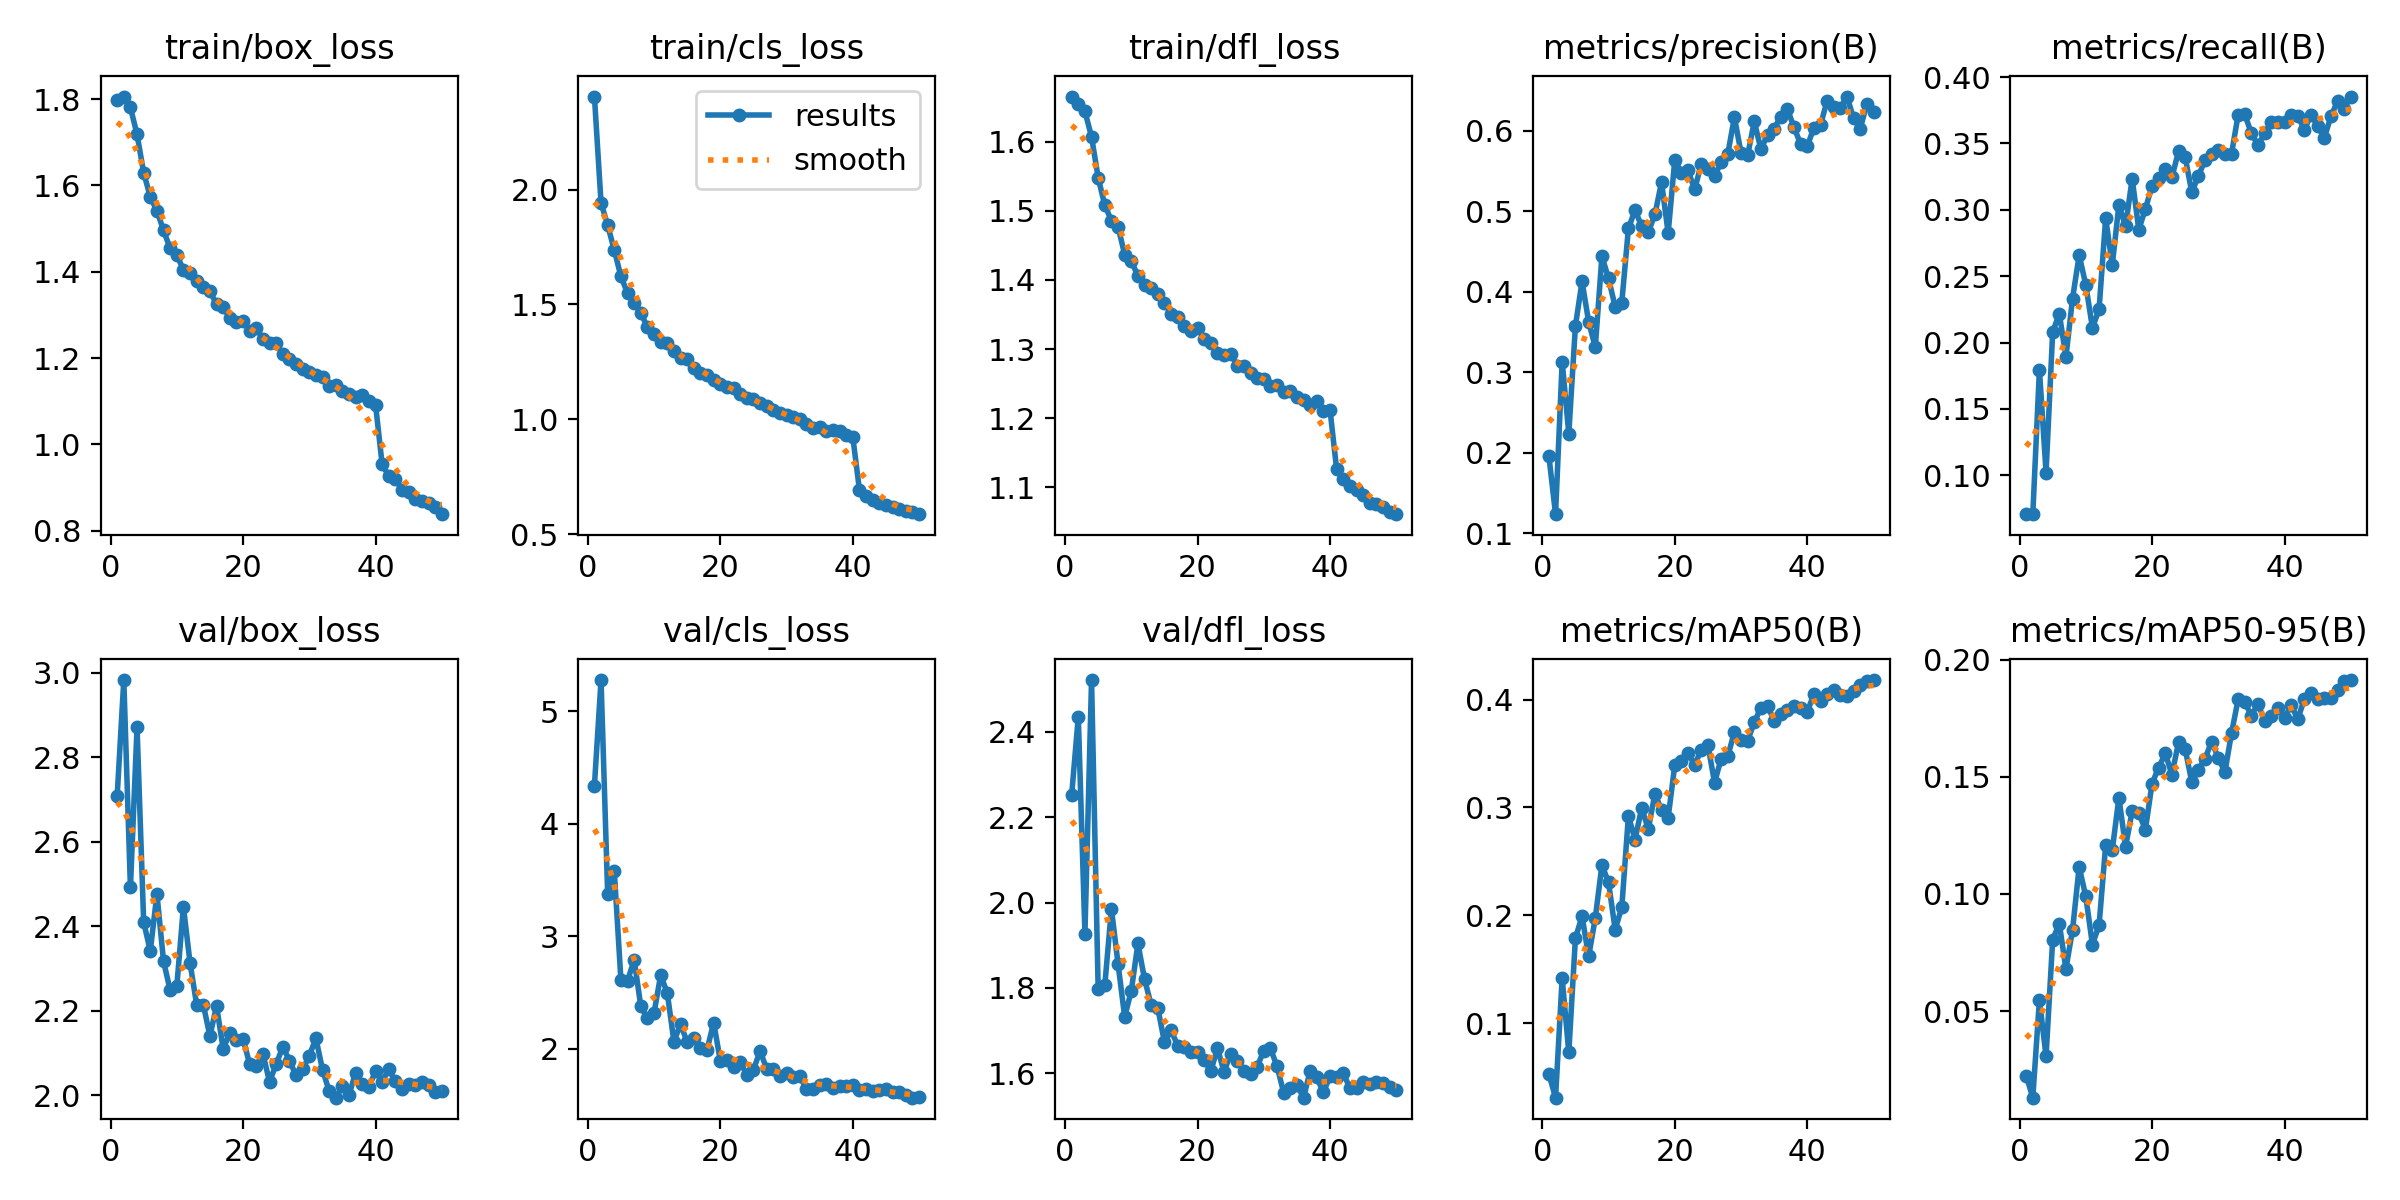

In [13]:
# Evaluate the model
metrics = model.val()

# Save the trained model
model.save("yolov8_trained.pt")

# Optional: Visualize the training results
from IPython.display import Image
Image(filename='runs/detect/train/results.png')  # Optional visualization of training results

In [14]:
import os

# Path to the trained model
trained_model_path = "runs/detect/train/weights/best.pt"

# Check if the file exists
if os.path.exists(trained_model_path):
    print(f"Trained model is located at: {trained_model_path}")
else:
    print("Trained model not found. Check your training logs for the correct path.")


Trained model is located at: runs/detect/train/weights/best.pt
